In [142]:
import pandas as pd
import numpy
import numpy as np

In [9]:
from matplotlib import pyplot as plt

In [46]:
gdp = pd.read_csv('gdp-per-capita-maddison-2020.csv')
lifexp = pd.read_csv('life-expectancy.csv')
population = pd.read_csv('population.csv')

In [52]:
#lifexp
#gdp
population.columns = ['Entity', 'Year', 'Population']
population

,Entity,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289
...,...,...,...
18283,Zimbabwe,2017,14751101
18284,Zimbabwe,2018,15052191
18285,Zimbabwe,2019,15354606
18286,Zimbabwe,2020,15669663


## this is a heading

In [13]:
gdp["Year"] = gdp["Year"].astype(int)

In [14]:
gdp["GDP per capita"] = gdp["GDP per capita"].astype(float)

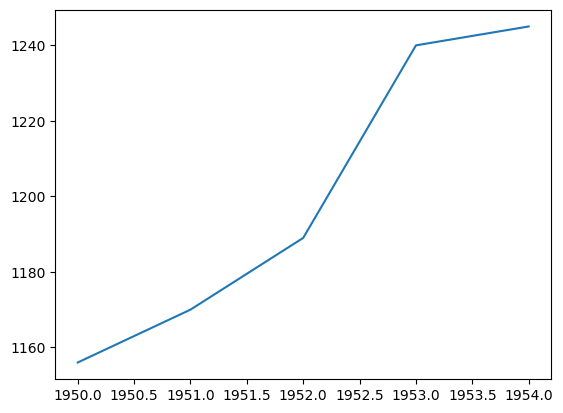

In [15]:
plt.plot(gdp['Year'].head(), gdp['GDP per capita'].head())


In [129]:
avgGDP = pd.DataFrame(list(zip(YearList, capitaList)), columns = ['Year', 'GDP mean'])
avgLifExp =pd.DataFrame(list(zip(YearList, lifexpList)), columns = ['Year', 'Life expectancy mean'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


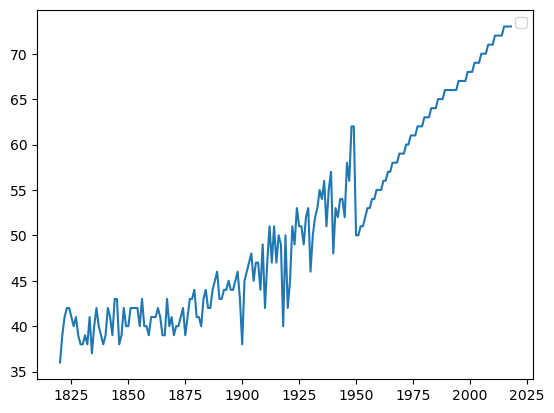

In [135]:
#plt.plot(avgGDP['Year'], avgGDP['GDP mean'])
plt.plot(avgLifExp['Year'], avgLifExp['Life expectancy mean'])

plt.show()

In [18]:
gdpCountrySet = list(set(gdp['Entity']))
gdpCountrySet.sort()
gdpYearSet = list(set(gdp['Year']))
gdpYearSet.sort()
lifexpCountrySet = list(set(lifexp['Entity']))
lifexpCountrySet.sort()
lifexpYearSet = list(set(lifexp['Year']))
lifexpYearSet.sort()

def getSet(table, lbl):
    newSet = list(set(table[lbl]))
    newSet.sort()
    return newSet



In [31]:
def tableToDict(table, lbl, countries): ## dict is sorted?
    new_dict = {}
    tYrs, tLbl = table['Year'], table[lbl]
    for i, c in enumerate(table['Entity']):
        if c in countries:
            new_dict.setdefault(c, {})
            new_dict[c].setdefault(tYrs[i], tLbl[i])
    return new_dict
        
def dictWithYearIntersection(dict1, dict2, countries): ## dict1, and dict2 must contain countries as keys
    newDict = {}
    
    for c in countries:
        yearDict = {}
        ydict1 = dict1[c]
        ydict2 = dict2[c]
        for y, v in ydict1.items():
            if y in ydict2:
                yearDict.setdefault(y, (v, ydict2[y]))            
        newDict.setdefault(c, yearDict)
    return newDict
    

In [117]:
def setWithFrequency(list):
    dict = {}
    for x in list:
        dict.setdefault(x,0)
        dict[x] += 1
    newList = []
    for x, y in dict.items():
        newList.append((x,y))
    return newList

def getCountryIntersection(t1, t2):
    c1, c2 = getSet(t1, 'Entity'), getSet(t2, 'Entity')
    return sorted(list(set(c1) & set(c2)))
                  
def dictionaryWithCountriesAndYears(t1, t2, lbl_one, lbl_two):
    countries = getCountryIntersection(t1, t2) # the countries that's in both tables
    # removeCountries(t1List)
    # removeCountries(t1List)
    dict1 = tableToDict(t1, lbl_one, countries)
    dict2 = tableToDict(t2, lbl_two, countries)
    new_dict = dictWithYearIntersection(dict1, dict2, countries)
    return new_dict

def buildTupleList(dict1):
    newList = []
    for country in dict1.keys():
        for year in dict1[country].keys():
            lbl_one = dict1[country][year][0]
            lbl_two = dict1[country][year][1]
            newList.append((country,year, lbl_one, lbl_two))
    return newList

#print(buildTupleList(d))


def buildTupleList2(dict1):
    newList = []
    for country in dict1.keys():
        for year in dict1[country].keys():
            lbl = dict1[country][year]
            newList.append((country,year, lbl))
    return newList


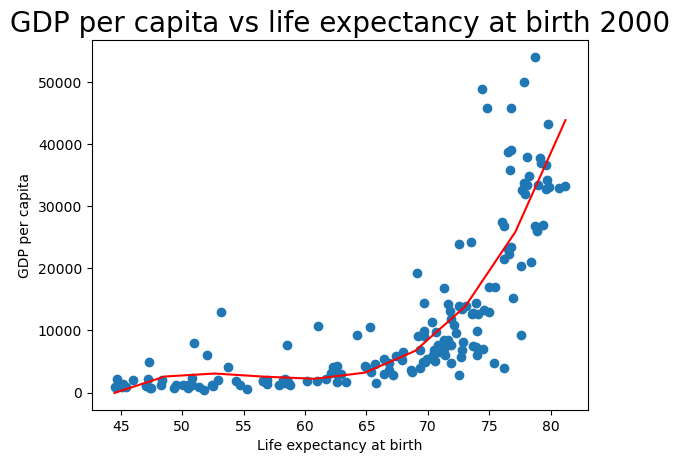

In [141]:
## gdp per capita 2000

d = dictionaryWithCountriesAndYears(gdp, lifexp, 'GDP per capita','Life expectancy at birth (historical)')
e = buildTupleList(d)

gdpAndLifexp = pd.DataFrame(e, columns = ['Country', 'Year', 'GDP per capita', 'Life expectancy at birth'])


countries_not_to_keep = ['North Korea', 'World']
yearCutoff = 2000
gdpAndLifexp = gdpAndLifexp[(~gdpAndLifexp['Country'].isin(countries_not_to_keep)) & (gdpAndLifexp['Year'] == yearCutoff)]

plt.xlabel('Life expectancy at birth')
plt.ylabel('GDP per capita')

x = gdpAndLifexp['Life expectancy at birth']
y = gdpAndLifexp['GDP per capita']
model = numpy.poly1d(numpy.polyfit(x, y, 3))

line = numpy.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="GDP per capita vs life expectancy at birth " + str(yearCutoff),
          fontsize=20
         )
plt.show()


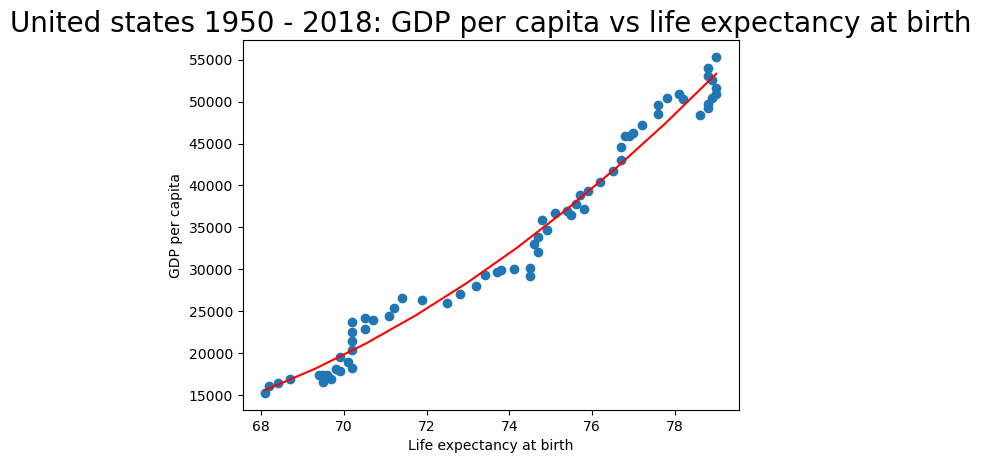

In [138]:
d = dictionaryWithCountriesAndYears(gdp, lifexp, 'GDP per capita','Life expectancy at birth (historical)')
e = buildTupleList(d)

gdpAndLifexp = pd.DataFrame(e, columns = ['Country', 'Year', 'GDP per capita', 'Life expectancy at birth'])


countries_not_to_keep = ['North Korea', 'World']
yearCutoff = 1950
gdpAndLifexp = gdpAndLifexp[(gdpAndLifexp['Country'] == 'United States') & (gdpAndLifexp['Year'] >= yearCutoff)]

plt.xlabel('Life expectancy at birth')
plt.ylabel('GDP per capita')

x = gdpAndLifexp['Life expectancy at birth']
y = gdpAndLifexp['GDP per capita']
model = numpy.poly1d(numpy.polyfit(x, y, 2))

line = numpy.linspace(min(x), max(x), 10)

plt.scatter(x, y)

plt.plot(line, model(line),color='red')
plt.title(label="United states 1950 - 2018: GDP per capita vs life expectancy at birth" ,
          fontsize=20
         )
plt.show()

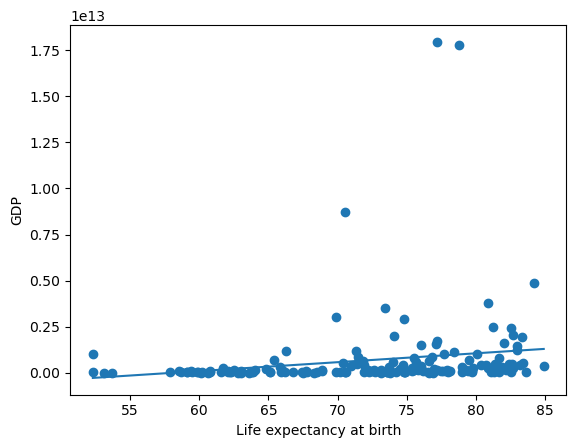

In [197]:
def dictionaryWithGDP(t1, t2, lbl_one, lbl_two):
    dict1 = dictionaryWithCountriesAndYears(t1, t2, lbl_one, lbl_two)
    new_dict = {}
    for c in dict1.keys():
        new_dict.setdefault(c,{})
        for x, y in dict1[c].items():
            new_dict[c].setdefault(x,(y[0]*y[1]))
    return new_dict
d = dictionaryWithGDP(gdp, population, 'GDP per capita', 'Population')
e = buildTupleList2(d)
gdp_c = pd.DataFrame(e, columns = ['Entity', 'Year', 'GDP'])
d = dictionaryWithCountriesAndYears(gdp_c, lifexp, 'GDP','Life expectancy at birth (historical)')
e = buildTupleList(d)

gdp_c = pd.DataFrame(e, columns = ['Country', 'Year', 'GDP', 'Life expectancy at birth'])



yearCutoff = 2017
gdp_c2000 = gdp_c[(~gdp_c['Country'].isin(countries_not_to_keep)) & (gdp_c['Year'] == yearCutoff)]
gdp_c2000
#print(sorted(set([i for i,v,y in e])))
plt.xlabel('Life expectancy at birth')
plt.ylabel('GDP')

x = gdp_c2000['Life expectancy at birth'].values.tolist()
y = gdp_c2000['GDP'].values.tolist()


len(x)/2

line = numpy.linspace(min(x), max(x), 10)

plt.scatter(x, y)
plt.plot(line, model(line))


plt.show()





#plt.show()


#print(e)
        
        

Text(0, 0.5, 'Probability Density')

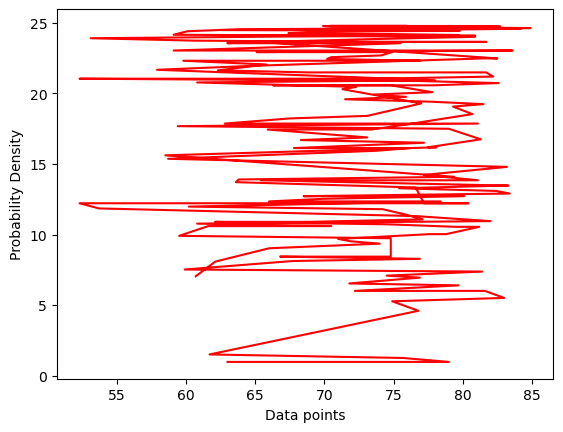

In [201]:
x = gdp_c2000['Life expectancy at birth'].values.tolist()
y = gdp_c2000['GDP'].values.tolist()
Y = sorted(y)
X = sorted(x)
xmax = X[-1]
xmin = X[0]
ymax = Y[-1]
ymin = Y[0]

def normal_dist(xmax, xmin, mean , sd):
    dist = np.linspace(xmin,xmax,200)
    prob_density = (np.pi*sd) * np.exp(-0.5*([xi - mean for xi in dist]/sd)**2)
    return prob_density



linsp = np.linspace(xmin,xmax,200)
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(X)
sd = np.std(X)
 
#Apply function to the data.
pdf = normal_dist(X,mean,sd)
 
#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')  

In [95]:
gdpCountryFreq = setWithFrequency(gdp['Entity'])
gdpYearFreq = setWithFrequency(gdp['Year'])
lifexpCountryFreq = setWithFrequency(lifexp['Entity'])
lifexpYearFreq = setWithFrequency(lifexp['Year'])

In [59]:
print([i for i,j in lifexpCountryFreq])

In [ ]:
'''
1 if x in country2List '''


def intersection(gdpCF, gdpYF, lifexpCF, lifexpYF):
    for x, y in gdpCF:
        if x in [v for v, w lifexpCF]
    
        
    
    
    
    
    

In [175]:
print(gdpCountrySet)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Asia', 'Eastern Europe', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'Former Sudan', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',

In [177]:
print(gdpYearSet)

In [179]:
print(lifexpCountrySet)

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 

In [ ]:
print(lifexpYearSet)

In [156]:
gdp['Entity']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
19871       Zimbabwe
19872       Zimbabwe
19873       Zimbabwe
19874       Zimbabwe
19875       Zimbabwe
Name: Entity, Length: 19876, dtype: object

In [119]:
gdp_c.to_csv('GDP2017.csv')

In [171]:
gdp_c2000.to_csv('GDP2017.csv')